<h1 align='center'> 신호 및 시스템 실습 8</h1>

<p style="text-align: right"> 2021.4.29. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 1차 제출: 오후 3:20까지 실습 시간에 마무리한 것을 제출
* 2차 마감: 1차 제출시 완성하지 못한 학생들은 4월 10일 (토) 오후 6:00까지 최종본 제출


## 채점

| 문제 1| 문제 2| 문제 3| P-3.1|P-3.3|P-3.5 | P-3.6 |P-3.8|P-3.10|P-3.11| 합계 |
--|--|--|--|--|--|--|--|--|--|--
 10 | 10 | 10 | 10 | 10 | 10 | 20 | 10 | 10 | 10 | 110

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이산 푸리에 급수와  역 이산 푸리에 급수

$$\tilde{X}[k] = {\displaystyle \sum_{n=0}^{N-1} \tilde{x}[n] e^{-j\frac{2\pi}{N}nk}}, k=0, 1, \cdots, N-1.$$
$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

#### 행렬과 벡터를 이용한 표현식

\begin{align*} 
	\tilde{\mathbf{X}} &= \mathbf{W}_N \tilde{\mathbf{x}},\\
	\tilde{\mathbf{x}} &= \frac{1}{N}\mathbf{W}^\ast_N \tilde{\mathbf{X}},
\end{align*}
$$
\mathbf{W}_N =  \begin{bmatrix}
        W_N^0 & W_N^0 & \cdots & W_N^0 \cdots & W_N^0 \\ \\[-3mm]
        W_N^0 & W_N^1 & \cdots & W_N^n \cdots & W_N^{N-1} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        W_N^0 & W_N^k & \cdots & W_N^{kn} \cdots & W_N^{k(N-1)} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        W_N^0 & W_N^{N-1} & \cdots & W_N^{(N-1)n} \cdots & W_N^{(N-1)^2}
    \end{bmatrix},
$$
${\displaystyle W_N=e^{-j\frac{2\pi}{N}}}$

행렬 $\mathbf{W}_N$에서 $W_N$의 지수 부분만 행렬로 표현하면 다음과 같다.

$$
\begin{bmatrix}
        0 & 0 & \cdots & 0 \cdots & 0 \\ \\[-3mm]
        0 & 1 & \cdots & n \cdots & {N-1} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        0 & k & \cdots & {kn} \cdots & {k(N-1)} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        0 & {N-1} & \cdots & {(N-1)n} \cdots & {(N-1)^2}
    \end{bmatrix},
$$

#### 문제 1. 
다음 주기 신호 $\tilde{x}[n]$의 푸리에 급수 $\tilde{X}[k]$를 구하라.

$$\tilde{x}[n] = \{\cdots, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, \cdots \}$$

1) $\tilde{x}[n]$의 한 주기를 numpy array로 표현하라.

In [2]:
x = np.array([1,2,3,4])

2) 다음 식을 이용해서 $\tilde{X}[k]$를 구하라.

$$\tilde{X}[k] = {\displaystyle \sum_{n=0}^{N-1} \tilde{x}[n] e^{-j\frac{2\pi}{N}nk}}, k=0, 1, \cdots, N-1.$$

In [3]:
def make_small_to_zero(X, atol=10e-15):           #연산오류를 어느정도 잡아준다
    X.real[np.isclose(X.real, 0, atol = atol)] = 0    #isclose = 대상에 충분히 가까운지       
    X.imag[np.isclose(X.imag, 0, atol = atol)] = 0


In [4]:
N = 4
X = np.zeros(N, dtype=complex)
W4 = np.exp(-1j  * 2 * np.pi / N)
for k in range(N):
    Xk = 0
    for n in range(N):
        Xk += x[n] * W4 ** (n*k)
    X[k] = Xk
    
make_small_to_zero(X)
print(X)

[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [5]:
X.real[np.isclose(X.real, 0, atol = 10e-15)] = 0
X.imag[np.isclose(X.imag, 0, atol = 10e-15)] = 0
X

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

3) 아래 셀에 있는 함수 plot_signal_and_spectrum은 시간 영역의 실수 신호 x와 푸리에 급수 X를 파라미터로 받아들여서 복소수 신호 X의 크기 스펙트럼과 위상 스펙트럼의 그래프를 그리는 함수이다. 이 함수를 호출하여 $\tilde{x}[n]$의 그래프와 $\tilde{X}[k]$의 크기 스펙트럼과 위상 스펙트럼의 그래프를 확인하라.

In [6]:
print(X)
print(abs(X))         #절댓값. 복소수의 크기
print(np.angle(X))         #복소수의 위상(세타)를 구함

[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[10.          2.82842712  2.          2.82842712]
[ 0.          2.35619449  3.14159265 -2.35619449]


In [7]:
def plot_signal_and_spectrum(x, X):
    plt.subplot(311)
    plt.stem(x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.subplot(312)
    plt.stem(np.abs(X))
    plt.xlabel("$k$")
    plt.ylabel("$|X[k]|$")
    plt.subplot(313)
    plt.stem(np.angle(X))
    plt.xlabel("$k$")
    plt.ylim(-1.1*np.pi, 1.1*np.pi)
    plt.yticks([-np.pi, np.pi], ["-$\pi$", "$\pi$"])
    plt.ylabel(r"$\angle X[k]$")    
    plt.tight_layout()
    plt.show()    

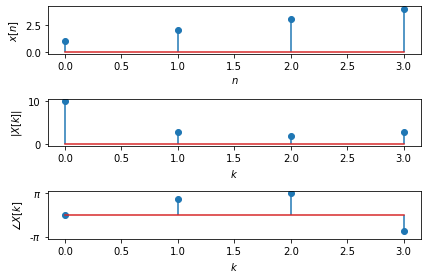

In [8]:
plot_signal_and_spectrum(x, X)


4) 다음 식을 이용해서 2) 번에서 구한 $\tilde{X}[k]$를 이용해서 $\tilde{x}[n]$을 구하고 이것이 원래 신호와 같은지 확인하라.

$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

In [10]:
N = 4
x1 = np.zeros(N, dtype=complex)
W4ast = np.exp(1j  * 2 * np.pi / N)
for n in range(N):
    Xn = 0
    for k in range(N):
        Xn += X[k] * W4ast ** (n*k)
    x1[n] = Xn / N
    
make_small_to_zero(x1)
print(x1)

[1.+0.j 2.+0.j 3.+0.j 4.+0.j]


5) 행렬과 벡터의 곱셈식을 이용하여 푸리에 급수를 계산하려고 한다. 행렬 $\mathbf{X}_4$의 모든 원소들은 $W_4$의 정수승들로 이루어졌다. 이 행렬의 지수에 해당하는 숫자들로만 이루어진 행렬을 numpy의 2차원 배열로 표현하라. 
```
array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])
```

In [17]:
for k in range(4):
    for n in range(4):
        print(n*k, end=' ')
    print()

0 0 0 0 
0 1 2 3 
0 2 4 6 
0 3 6 9 


In [22]:
#numpy가 간단하다
k = np.arange(4).reshape(4,1)
print(k, end='\n\n')
n = np.arange(4)
print(n, end='\n\n')
print(k * n)     #numpy array broadcasting

[[0]
 [1]
 [2]
 [3]]

[0 1 2 3]

[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]


5) 행렬과 벡터의 곱셈식을 이용하여 푸리에 급수를 계산하려고 한다. 행렬 $\mathbf{W}_4$를 numpy의 2차원 배열로 표현하라.

In [20]:
W_mat = W4 ** (n*k)
make_small_to_zero(W_mat)
W_mat @ x, X

(array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j]),
 array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j]))

6) 이 결과와 numpy.fft.fft를 이용해서 구한 결과와 비교하라.

FFT: fast Fourier transform

In [26]:
np.fft.fft(X)   #이산푸리에급수

array([ 4.-1.33226763e-15j, 16.+2.22044605e-15j, 12.+1.33226763e-15j,
        8.-2.22044605e-15j])

In [25]:
np.fft.ifft(X)    #역이산푸리에급수

array([1.-3.33066907e-16j, 2.-5.55111512e-16j, 3.+3.33066907e-16j,
       4.+5.55111512e-16j])

7) 이산 푸리에 급수와 역 이산 푸리에 급수 함수 DFS를 작성하라.

In [23]:
def DFS(x):    # np.fft.fft
    N = x.size
    k = np.arange(N)
    X = 2*np.cos(2*np.pi*k/N) + 2*np.cos(4*np.pi*k/N) + 1
    return X

In [24]:
def iDFS(x):   #npfft.ifft
    N = x.size
    k = np.arange(N)
    X = 2*np.cos(2*np.pi*k/N) + 2*np.cos(4*np.pi*k/N) + 1
    X = 1/X
    return X

#### 예제 1. 톤 신호

다음 신호를 생각해 보자.

$$ x(t) = A \cos(2\pi ft + \phi)$$

다음 함수는 주파수가 f인 코사인파를 duration(초) 동안 샘플링 주파수 fs로 샘플링한 이산시간 신호를 numpy.ndarray로 반환하는 함수이다.

In [25]:
def cos_wave(A, f, fs, phi, duration):
    t = np.arange(0, duration, 1/fs)
    return t, A * np.cos(2 * np.pi * f * t + phi)

#### 문제 2. 정현파의 스펙트럼 구하기

1) 주파수가 1 Hz, 진폭이 1, 위상이 0인 사인파를 2초 길이만큼 샘플링한 신호의 그래프를 그려라. 단, 샘플링 주파수는 50 Hz로 한다.

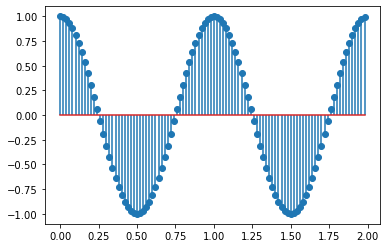

In [76]:
fs = 50.
t, x0 = cos_wave(1, 1, fs, 0, 2)

plt.stem(t, x0)
plt.show()

2) 이 정현파의 한 주기를 numpy 배열 x2로 표현하라.

In [82]:
x0.size  # == len(x0)

100

<StemContainer object of 3 artists>

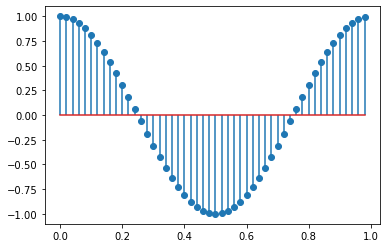

In [97]:
x2 = x0[:50]
x2.size
plt.stem(t[:50], x2)

3) x2의 이산푸리에 변환을 구하고, x2의 그래프와 X2의 크기 스펙트럼과 위상 스펙트럼을 확인하라.

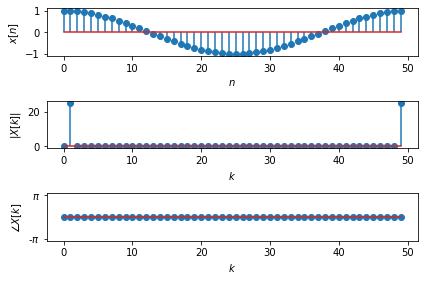

In [98]:
X2 = np.fft.fft(x2)
make_small_to_zero(X2)
plot_signal_and_spectrum(x2, X2)

In [11]:
X2[:5], X2[-5:]

NameError: name 'X2' is not defined

4) 이 신호의 스펙트럼에서 0이 아닌 $X[k]$를 구하라.

**답**: X[1], X[49]

5) 4)에서 구한 $X[k]$를 아래 식에 대입해서 $\tilde{x}[n]$의 식을 표현하라.

$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

**답**:


\begin{align*}
\tilde{x}[n] &= {\displaystyle  \frac{1}{50} \sum_{k=0}^{99} \tilde{X}[k] e^{j\frac{2\pi}{50}kn}}\\
&= {\displaystyle  \frac{1}{50} \left(25 e^{j\frac{2\pi}{50}(1)n} + 25 e^{j\frac{2\pi}{50}(49)n}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(e^{j\frac{2\pi}{50}(1)n} + e^{j\left(\frac{2\pi}{50}(49)n-2\pi n\right)}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(e^{j\frac{2\pi}{50}(1)n} + e^{j\frac{2\pi}{50}(-1)n}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(\cos\left(\frac{2\pi}{50}n\right) + j\sin\left(\frac{2\pi}{50}n\right) + \cos\left(\frac{2\pi}{50}n\right) -j \sin\left(\frac{2\pi}{50}n\right)\right)}\\
&= \cos\left(\frac{2\pi}{50}n\right) \\
&= \cos\left(2\pi\frac{n}{50}\right)
\end{align*}


6) $x(t)$를 샘플링할 때 사용한 샘플링 주파수가 $f_s = 50$Hz인 것을 고려해서, $X[1]$과 $X[-1]$에서 1과 $-1$은 연속시간 신호 $x(t)$에서 어떤 주파수에 해당하는지 설명하라.

**답**: $f_s = 50$인 경우에 이산시간 신호 $x[n]$으로부터 복원할 수 있는 최대 주파수는 $f_s/2 = 25$ Hz이다.

한 주기 동안 샘플 수가 50 개인 경우에 
- $X[0]$부터 $X[24]$까지는 $0 \le \hat{f} < 0.5$이고 
- $X[25]$부터 $X[49]$까지는 $-0.5 \le \hat{f} < 0$의 주파수 성분이다.

그리고 $-0.5 \le \hat{f} < 0.5$ 사이의 주파수는 연속 시간 주파수의 $-25 \le f < 25$ 범위에 해당한다.

그리고 이 범위의 주파수를 50 개의 샘플로 샘플링한 것과 같기 때문에 이산시간 주파수 인덱스$k$는 연속시간 주파수 $k$ Hz에 대응한다.



7) 

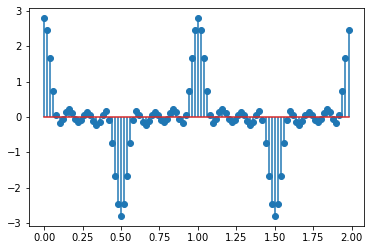

In [103]:
fs = 50.
t, x0 = cos_wave(1.0, 1., fs, 0., 2)
t, x1 = cos_wave(0.8, 3., fs, 0., 2)
t, x2 = cos_wave(0.6, 5., fs, 0., 2)
t, x3 = cos_wave(0.4, 7., fs, 0., 2)
x = x0 + x1 + x2 + x3
plt.stem(t, x)
plt.show()

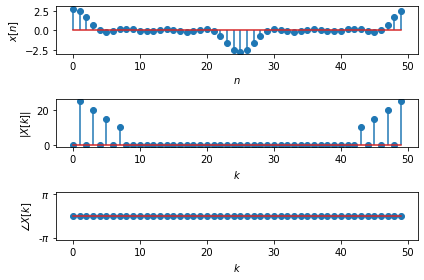

In [104]:
x5 = x[:50]
X5 = np.fft.fft(x5)
make_small_to_zero(X5)
plot_signal_and_spectrum(x5, X5)

In [106]:
X5[:10]

array([ 0.+0.j, 25.+0.j,  0.+0.j, 20.+0.j,  0.+0.j, 15.+0.j,  0.+0.j,
       10.+0.j,  0.+0.j,  0.+0.j])